# Course AH2174/FAH3002 - Traffic Simulation Modeling and Applications   
Project 2 - 2.1  
Author: Pengnan Chi  
Date: 11.24.2024


### Task: Implement the IDM (Intelligent Driver Model)

In this section, you will implement the IDM, which is a widely used car-following model.

#### Implementation Steps:
1. Define the IDM parameters.
2. Implement a function to calculate $s^*$.
3. Implement a function to calculate the acceleration $a(t)$.
4. Simulate the car-following behavior using IDM.

#### Instructions:
- Follow the provided structure to fill in the required code.
- Ensure your code is efficient and well-documented.

Below, the areas marked with `# YOU CODE HERE` indicate where you need to add your implementation.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

class Car():
    """
    Represents a single car in the platoon with its speed and displacement states.
    """
    def __init__(self, initSpeed, initDisplacement, id=0):
        """
        Initializes a car with its initial speed and displacement.
        """
        self.speed = [initSpeed]  # Speed history of the car
        self.displacement = [initDisplacement]  # Displacement history of the car
        self.name = id  # Unique ID of the car

    def currState(self):
        """
        Returns the current speed and displacement of the car.
        """
        return self.speed[-1], self.displacement[-1]
    
    def prevState(self):
        """
        Returns the previous speed and displacement of the car.
        Ensure that at least one previous state exists.
        """
        assert len(self.speed) >= 2, "No previous state available."
        return self.speed[-2], self.displacement[-2]
    
    def updateState(self, s, d):
        """
        Updates the current state (speed and displacement) of the car.
        """
        self.speed.append(s)
        self.displacement.append(d)


class IntelligentDriverModel():
    """
    Simulates a platoon of cars using the Intelligent Driver Model (IDM).
    """
    def __init__(self, nCars=8):
        """
        Initializes the platoon with nCars.
        Cars are evenly spaced initially, with speed 0.
        """
        self.n = nCars
        self.platoon = [
            Car(initSpeed=0, initDisplacement=(nCars-i-1)*10, id=i) for i in range(nCars)
        ]

    def setParam(self, desiredSpeed, timeGap, minGap, accExp, acc, dec, randomTimeGap):
        """
        Sets the parameters for the IDM model.

        Parameters:
        - desiredSpeed: Desired speed (v0) in m/s.
        - timeGap: Safe time headway (T) in seconds.
        - minGap: Minimum safe gap (s0) in meters.
        - accExp: Acceleration exponent (delta).
        - acc: Maximum acceleration (a) in m/s².
        - dec: Comfortable deceleration (b) in m/s².
        - randomTimeGap: Boolean indicating whether to use random time gaps.
        """
        ####################################################################
        #  YOU CODE HERE: Store the parameters as class attributes.
        ####################################################################


    def calcDesiredGap(self, v, vLeading):
        """
        Calculates the desired minimum gap (s*) for the IDM model.

        Parameters:
        - v: Current speed of the car (m/s).
        - vLeading: Speed of the leading car (m/s).

        Returns:
        - sStar: Desired minimum gap (m).
        """
        ####################################################################
        #  YOU CODE HERE: Implement the desired gap formula.
        #  Hint: Use self.s0, self.T, v, vLeading, self.a, self.b
        ####################################################################
        pass

    def calcAcceleration(self, v, s, sStar):
        """
        Calculates the acceleration for the IDM model.

        Parameters:
        - v: Current speed of the car (m/s).
        - s: Current gap to the leading car (m).
        - sStar: Desired minimum gap (m).

        Returns:
        - acceleration: Calculated acceleration (m/s²).
        """
        ####################################################################
        #  YOU CODE HERE: Implement the IDM acceleration formula.
        #  Hint: Use self.v0, self.delta, v, s, sStar
        ####################################################################
        pass

    def calcSafeSpeed(self, vLeading, s, deltaT):
        """
        Calculates the safe speed to avoid collision with the leading car.

        Parameters:
        - vLeading: Speed of the leading car (m/s).
        - s: Current gap to the leading car (m).
        - deltaT: Simulation time step (s).

        Returns:
        - safeSpeed: Calculated safe speed (m/s).
        """
        ####################################################################
        #  YOU CODE HERE: Implement the safe speed formula.
        #  Hint: Use self.b, deltaT, vLeading, s, self.s0
        ####################################################################
        pass

    def stimulate(self, granularity=0.1):
        """
        Simulates the behavior of the platoon under three scenarios:
        - Acceleration
        - Normal driving
        - Deceleration

        Parameters:
        - granularity: Time step for the simulation (s).
        """
        ####################################################################
        #  YOU CODE HERE: Implement the stimulation logic.
        #  Use the methods above to calculate acceleration, safe speed, 
        #  and update the state of each car in the platoon.
        ####################################################################
        pass

# highway

In [ ]:
idm = IntelligentDriverModel()
param = {
     'desiredSpeed': 33.3333, 
     'timeGap': 1, 
     'minGap': 2, 
     'accExp': 4, 
     'acc': 1, 
     'dec':1.5,
     'randomTimeGap':False
}
idm.setParam(**param)

In [19]:
idm.stimulate(0.001)

Stimulation for acceleration...
Stimulation for normal driving...
Stimulation for deceleration...


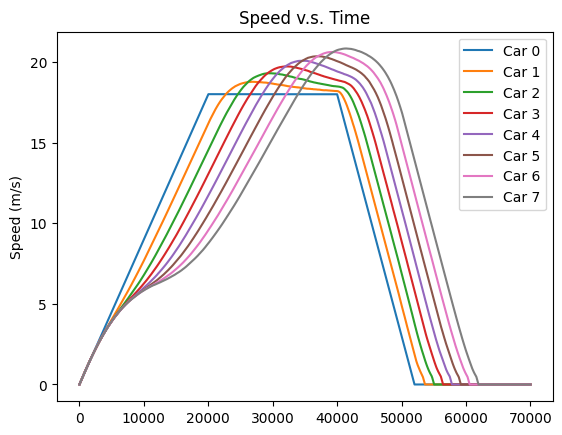

In [20]:
for car in idm.platoon:
    plt.plot(car.speed, label=f"Car {car.name}")

plt.title("Speed v.s. Time")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.show()

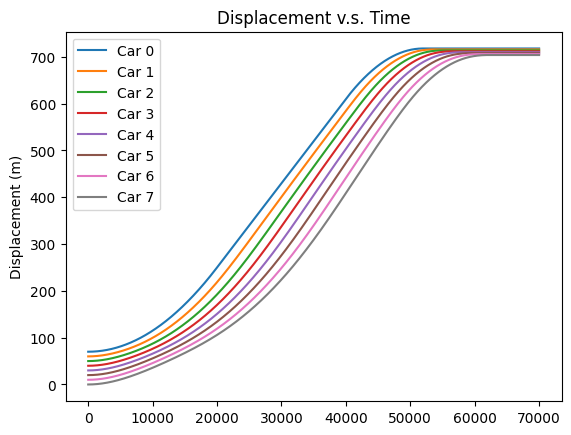

In [21]:
for car in idm.platoon:
    plt.plot(car.displacement, label=f"Car {car.name}")

plt.title("Displacement v.s. Time")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

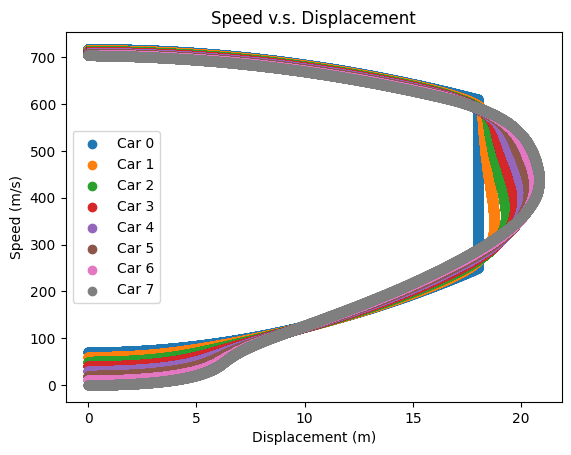

In [22]:
for car in idm.platoon:
    plt.scatter(car.speed, car.displacement, label=f"Car {car.name}")

plt.title("Speed v.s. Displacement")
plt.ylabel("Speed (m/s)")
plt.xlabel("Displacement (m)")
plt.legend()
plt.show()

# city traffic

In [ ]:
idm = IntelligentDriverModel()
param = {
     'desiredSpeed': 15, 
     'timeGap': 1, 
     'minGap': 2, 
     'accExp': 4, 
     'acc': 1, 
     'dec':1.5,
     'randomTimeGap':False
}
idm.setParam(**param)
idm.stimulate(0.001)

Stimulation for acceleration...
Stimulation for normal driving...
Stimulation for deceleration...


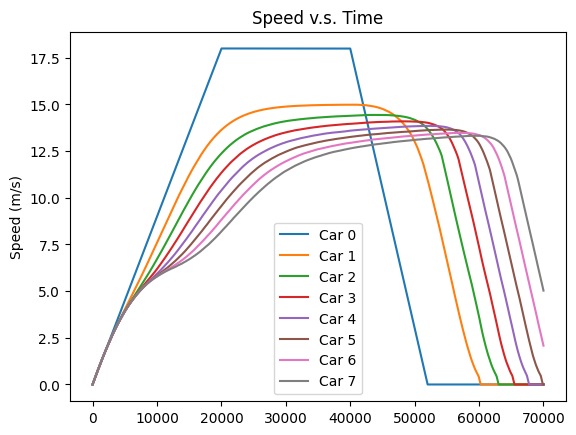

In [24]:
for car in idm.platoon:
    plt.plot(car.speed, label=f"Car {car.name}")

plt.title("Speed v.s. Time")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.show()

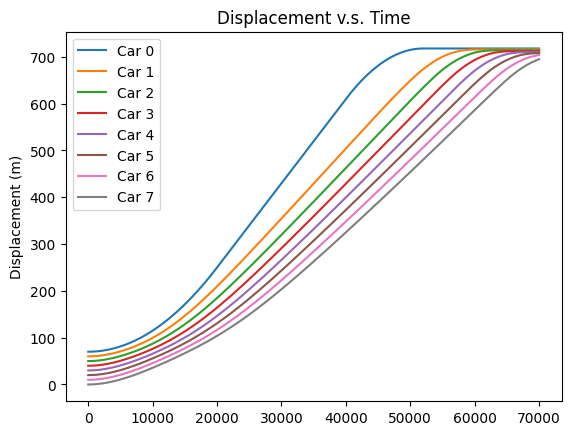

In [25]:
for car in idm.platoon:
    plt.plot(car.displacement, label=f"Car {car.name}")

plt.title("Displacement v.s. Time")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

# time gap following uniform - highway

In [ ]:
idm = IntelligentDriverModel()
param = {
     'desiredSpeed': 33.3333, 
     'timeGap': 1, 
     'minGap': 2, 
     'accExp': 4, 
     'acc': 1, 
     'dec':1.5,
     'randomTimeGap':True
}
idm.setParam(**param)
idm.stimulate(0.001)

Stimulation for acceleration...
Stimulation for normal driving...
Stimulation for deceleration...


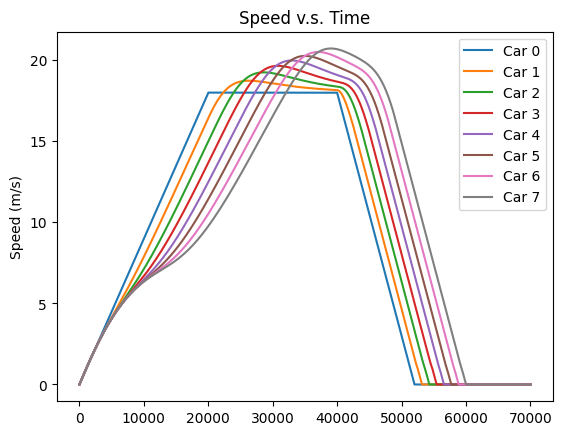

In [27]:
for car in idm.platoon:
    plt.plot(car.speed, label=f"Car {car.name}")

plt.title("Speed v.s. Time")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.show()

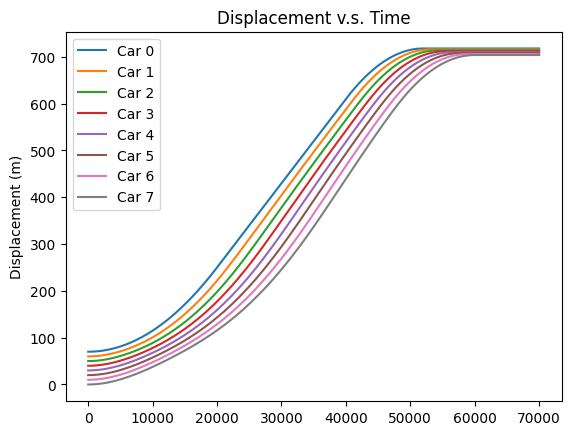

In [28]:
for car in idm.platoon:
    plt.plot(car.displacement, label=f"Car {car.name}")

plt.title("Displacement v.s. Time")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()